# Content recommendation algorithm 

## Problem Statement:

ContentFlow is a content recommendation platforms which aims to provide personalized content recommendations to its users based on their preferences and behaviours. The platform collects user data such as browsing history, search queries, and interactions with the platform, to build a recommendation system that suggests relevant content to each user.

Develop an algorithm that utilizes the user data to make accurate content recommendations. The algorithm should consider the user's historical preferences, similarity to other users, and the content's relevance to generate personalized recommendations.

The goal is to maximize the user engagement and satisfaction by delivering high-quality content that aligns with their interests and preferences.

**`Note: ContentFlow is a fictional company name created for illustrative purposes.`**

## Dataset:

● `Users:` The dataset includes information about the users, such as age, gender, location, and interests.  
● `Content Items:` The dataset includes information about the content items such as genre, release date, popularity and ratings.  
● `User Interactions:` The dataset includes information about the user interactions with the content items such as views, likes, shares and comments.

## Actions:

The recommendation system will generate a ranked list of content items to recommend to each user. The actions in this case involve selecting and presenting the recommended content items to the users.

## Observations:

The observations in this case are the user profiles, content item features, and user interactions with the content items. These observations are used to learn patterns and make predictions about the user preferences.

## UCB algorithm

`UCB (Upper Confidence Bound)` is a popular algorithm used to solve `multi-armed bandit` problems and `reinforcement learning`. It balances exploration and exploitation by estimating the uncertainity or confidence in the estimated values of actions.

This problem can be thought of a multi-armed bandit problem, with different types of content being its arms. We need to find the content which best suits the user. The company is the player who does not know about the rewards (satisfaction of user) of recommending the items.

## Code:



In [39]:
import math
import random 
import matplotlib.pyplot as plt

class ContentRecommendation:
    def __init__(self, num_of_items, sample_size, num_of_recommendations):
        self.num_of_items = num_of_items  # totals number of articles
        self.sample_size = sample_size  # total number of recommendations we will make
        self.num_of_recommendations = num_of_recommendations
        self.UCB = [0] * self.num_of_items # stores the UCB values for all items
        self.totalReward = [0] * self.num_of_items # stores the total rewards for each item
        self.count = [0] * self.num_of_items # stores the number of times an item was recommended
        self.time = 1
        self.items = {0: "Tutorials", 1: "Vlogs", 2: "Music", 3: "Comedy", 4: "Gaming", 5: "Documentry", 6: "Podcast", 7: "ASMR", 8: "Product Review", 9: "Fitness and Wellness"}
        self.recommendCount = [0] * self.num_of_items # stores the number of times an item was recommended
        self.recommend = [] # stores the top number of recommendations
        self.topThreeIndices = [] # stores the index of the top recommendations

    def recommendAlgorithm(self):
        for i in range(self.num_of_items):
            first_term = self.totalReward[i]/(self.count[i] + 1)
            second_term = math.sqrt(2*math.log(self.time) / (self.count[i] + 1))

            UCB_val = first_term + second_term  # main UCB formula
            self.UCB[i] += UCB_val 

        max_UCB = max(self.UCB)
        index = self.UCB.index(max_UCB)
        self.count[index] += 1
        self.recommendCount[index] += 1
        self.rewardGenerator(index)

    # this rewardGenerator depends on the user interaction with items, you can create your own logic for this  
    def rewardGenerator(self, item):
        if item == 0:
            reward = random.uniform(0.0, 0.4)
        elif item == 1:
            reward = random.uniform(0.6, 1.0)
        elif item == 2:
            reward = random.uniform(0.4, 0.7)
        elif item == 3:
            reward = random.uniform(0.3, 0.7)
        elif item == 4:
            reward = random.uniform(0.0, 0.5)
        elif item == 5:
            reward = random.uniform(0.4, 0.7)
        elif item == 6:
            reward = random.uniform(0.5, 0.7)
        elif item == 7:
            reward = random.uniform(0.3, 0.5)
        elif item == 8:
            reward = random.uniform(0.0, 0.4)
        else:
            reward = random.uniform(0.2, 0.6)

        self.totalReward[item] += reward 

    def topRecommendation(self):
        sorted_values = sorted(enumerate(self.recommendCount), key = lambda x: x[1], reverse = True)
        topThree = sorted_values[:self.num_of_recommendations]
        for index, value in topThree:
            self.recommend.append(self.items[index])
            self.topThreeIndices.append(index)
        return self.recommend 

    def newSelection(self):
        while self.time <= self.sample_size:
            self.time += 1
            self.recommendAlgorithm()

        return self.topRecommendation()
    
    def plotGraph(self):

        x_label = ["Tutorials", "Vlogs", "Music", "Comedy", "Gaming", "Documentry", "Podcast", "ASMR", "Product Review", "Fitness and Wellness"] 
        y_label = self.recommendCount

        colors = ['DarkBlue' if i in self.topThreeIndices else 'Orange' for i in range(len(self.recommendCount))]

        plt.bar(x_label, y_label, color = colors)
        plt.xlabel("Type of content")
        plt.ylabel("Recommendation Count")
        plt.title("Recommendation Plot")
        plt.xticks(rotation = 45)
        plt.show()


Top 3 recommendations for the user are: ['Vlogs', 'Documentry', 'Podcast']


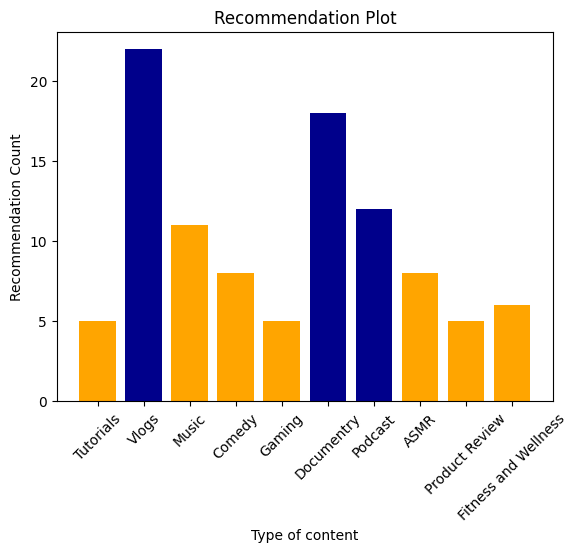

In [42]:
numberOfItems = 10
sampleSize = 100
numTopRecommend = 3 # no. of top recommendations wanted

cr = ContentRecommendation(numberOfItems, sampleSize, numTopRecommend)
print(f"Top {numTopRecommend} recommendations for the user are:", cr.newSelection())
cr.plotGraph()